# Advanced Data Summarization in Stock Market Analysis
## A Case Study Using Top Indian Stocks

**Objective:**  
This notebook demonstrates advanced statistical data summarization techniques applied to real stock market data from top Indian companies.

**Sections:**
1. Import libraries
2. Fetch stock data via yfinance
3. Central tendency (mean, median, mode)
4. Variation (range, IQR, variance, std)
5. Shape (skewness, kurtosis)
6. Visualizations
7. Conclusion

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(style="whitegrid")

In [3]:
# Top Indian stocks (NSE tickers)
tickers = [
    'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS',
    'SBIN.NS', 'BHARTIARTL.NS', 'HINDUNILVR.NS', 'ITC.NS', 'KOTAKBANK.NS'
]

# Get 1 year daily closing prices
data = yf.download(tickers, period='1y', interval='1d')['Close']
data = data.dropna()  # Drop missing values
data.head()

/tmp/ipykernel_95471/1148002478.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='1y', interval='1d')['Close']
[*********************100%***********************]  10 of 10 completed


Ticker,BHARTIARTL.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INFY.NS,ITC.NS,KOTAKBANK.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,,,,,,,
2024-10-30,1619.808594,855.733093,2499.280762,1302.102905,1750.301025,475.156921,1732.602417,1338.553955,806.260620,3947.343994
2024-10-31,1599.230591,856.275696,2473.162354,1282.355225,1706.740234,472.498657,1729.106445,1326.751099,804.054932,3835.050293
2024-11-01,1603.048584,857.065125,2482.210938,1281.908691,1710.236572,473.948608,1742.391113,1333.324829,805.035278,3850.270508
2024-11-04,1578.057617,845.619751,2469.787598,1267.420410,1712.956177,468.438751,1727.358398,1296.970093,813.514954,3830.894775
2024-11-05,1565.314209,867.203003,2466.412842,1286.771118,1703.777710,464.185486,1755.126465,1300.107544,832.484070,3837.852539


,Mean,Median,Mode
RELIANCE.NS,1337.827621,1363.354980,1273.115234
TCS.NS,3509.079668,3426.945312,3442.320557
HDFCBANK.NS,922.035061,947.147461,843.794495
INFY.NS,1613.155593,1557.752563,1420.060547
ICICIBANK.NS,1347.474824,1372.000000,1223.509277
SBIN.NS,795.436862,800.049988,708.915283
BHARTIARTL.NS,1774.589594,1818.993408,1573.743652
HINDUNILVR.NS,2396.283195,2365.919678,2148.654297
ITC.NS,421.521449,416.850006,416.850006
KOTAKBANK.NS,1994.262274,1992.699951,1792.633179


<Figure size 1200x600 with 0 Axes>

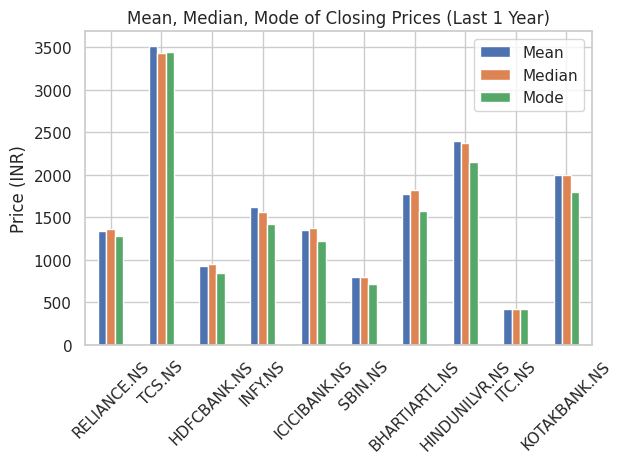

In [4]:
summary = pd.DataFrame(index=tickers)
for t in tickers:
    summary.loc[t, 'Mean'] = data[t].mean()
    summary.loc[t, 'Median'] = data[t].median()
    summary.loc[t, 'Mode'] = data[t].mode()[0]

display(summary[['Mean', 'Median', 'Mode']])

# Plot Mean, Median, Mode
plt.figure(figsize=(12,6))
summary[['Mean', 'Median', 'Mode']].plot(kind='bar')
plt.title('Mean, Median, Mode of Closing Prices (Last 1 Year)')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,Range,IQR,Variance,Std Dev
RELIANCE.NS,378.089966,164.337036,8820.149574,93.915651
TCS.NS,1445.842041,811.041260,165951.483268,407.371432
HDFCBANK.NS,208.868103,114.995544,3889.498945,62.365848
INFY.NS,585.618896,304.540527,27299.975124,165.227041
ICICIBANK.NS,290.210693,149.745117,6676.205327,81.708049
SBIN.NS,265.408569,64.749817,2547.867808,50.476408
BHARTIARTL.NS,588.094482,291.959229,24272.204730,155.795394
HINDUNILVR.NS,557.700928,186.626465,16150.002739,127.082661
ITC.NS,87.450439,20.250000,412.502825,20.310166
KOTAKBANK.NS,580.281006,230.833862,23697.813546,153.940942


<Figure size 1200x600 with 0 Axes>

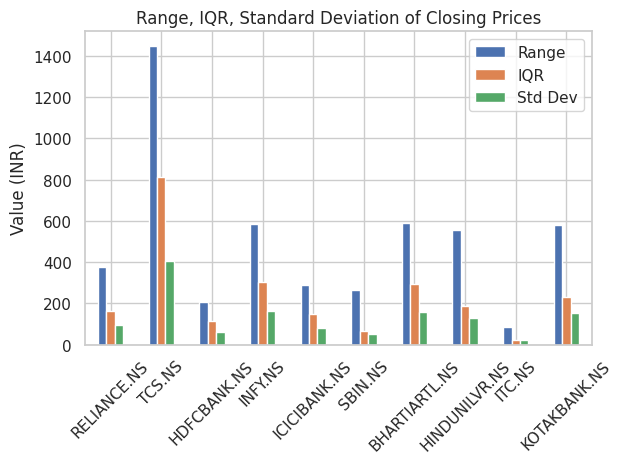

In [5]:
for t in tickers:
    summary.loc[t, 'Range'] = data[t].max() - data[t].min()
    summary.loc[t, 'IQR'] = data[t].quantile(0.75) - data[t].quantile(0.25)
    summary.loc[t, 'Variance'] = data[t].var()
    summary.loc[t, 'Std Dev'] = data[t].std()

display(summary[['Range', 'IQR', 'Variance', 'Std Dev']])

# Plot Range, IQR, Std Dev
plt.figure(figsize=(12,6))
summary[['Range', 'IQR', 'Std Dev']].plot(kind='bar')
plt.title('Range, IQR, Standard Deviation of Closing Prices')
plt.ylabel('Value (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,Skewness,Kurtosis
RELIANCE.NS,0.074779,-1.153880
TCS.NS,0.363612,-1.151136
HDFCBANK.NS,-0.293780,-1.337140
INFY.NS,0.461472,-1.204489
ICICIBANK.NS,-0.312927,-1.324587
SBIN.NS,0.123589,0.071012
BHARTIARTL.NS,-0.025420,-1.384133
HINDUNILVR.NS,0.268351,-0.604760
ITC.NS,0.928664,0.002861
KOTAKBANK.NS,-0.306167,-1.071393


<Figure size 1200x600 with 0 Axes>

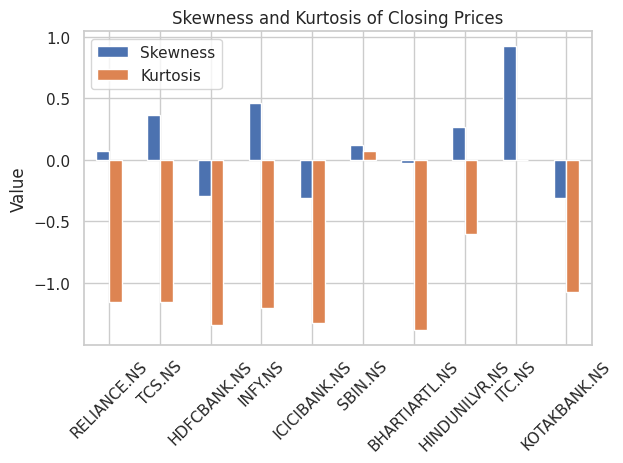

In [6]:
for t in tickers:
    summary.loc[t, 'Skewness'] = stats.skew(data[t])
    summary.loc[t, 'Kurtosis'] = stats.kurtosis(data[t], fisher=True)

display(summary[['Skewness', 'Kurtosis']])

# Plot Skewness and Kurtosis
plt.figure(figsize=(12,6))
summary[['Skewness', 'Kurtosis']].plot(kind='bar')
plt.title('Skewness and Kurtosis of Closing Prices')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

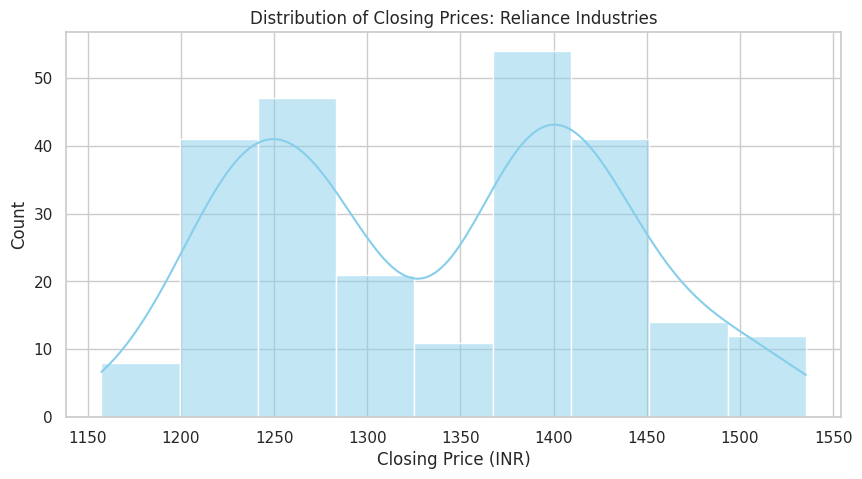

In [7]:
plt.figure(figsize=(10,5))
sns.histplot(data['RELIANCE.NS'], kde=True, color='skyblue')
plt.title('Distribution of Closing Prices: Reliance Industries')
plt.xlabel('Closing Price (INR)')
plt.show()

### Conclusion

- **Mean, Median, Mode** help understand central price tendency.
- **Range, IQR, Variance, Std Dev** show volatility and spread.
- **Skewness and Kurtosis** reveal symmetry and risk of extreme moves.

These statistical summaries are crucial for portfolio construction, risk assessment, and investment decisions in the stock market.

